In [ ]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
import re
import string
import random
import matplotlib.pyplot as plt

from PIL import Image
import requests
from io import BytesIO
%matplotlib inline

In [ ]:
df = pd.read_csv('merge_all_fix_2.csv')
# merge_brown spot_leaf blast.csv

# Eksploratory data analysis

In [ ]:
df.head()


,product_id,product_link,kegunaan,nama,ulasan,rating,harga,berat,tempat,image-src
0,1653403927-69,https://www.tokopedia.com/arsyla-store27/filia...,Leaf Blast,filia 525se 250ml fungisida obat hawar daun da...,32,4.7,103000,300 Gram,Kab. Probolinggo,https://images.tokopedia.net/img/cache/100-squ...
1,1653404248-71,https://ta.tokopedia.com/promo/v1/clicks/8a-xg...,Leaf Blast,DITHANE M-45 80 WP 200 GRAM KEMASAN PABRIK FUN...,154,5.0,35000,300 Gram,Jakarta Barat,https://images.tokopedia.net/img/cache/100-squ...
2,1653400654-63,https://www.tokopedia.com/mitratanibwi/fungisi...,Leaf Blast,Fungisida FILIA 525SE 250ML,9,5.0,130000,350 Gram,Kab. Banyuwangi,https://images.tokopedia.net/img/cache/100-squ...
3,1653400015-62,https://www.tokopedia.com/priagungjaya/fungisi...,Leaf Blast,fungisida FILIA 525SE 250ML,NaN,NaN,127000,400 Gram,Kab. Bekasi,https://images.tokopedia.net/img/cache/100-squ...
4,1653397693-58,https://www.tokopedia.com/tokosuksestani/fungi...,Leaf Blast,Fungisida sistemik FILIA 525SE penyakit blast ...,1,5.0,34000,150 Gram,Kab. Kediri,https://images.tokopedia.net/img/cache/100-squ...


In [ ]:
# rating distribution
# df['rating'].value_counts().plot(x='genre', y='count', kind='bar', figsize=(10,5))

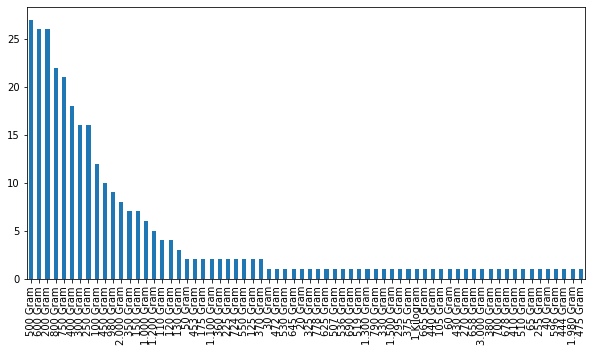

In [ ]:
# berat distribution
df['berat'].value_counts().plot(x='genre', y='count', kind='bar', figsize=(10,5))

In [ ]:
# kegunaan distribution
# df['ulasan'].value_counts().plot(x='ulasan', y='count', kind='bar')

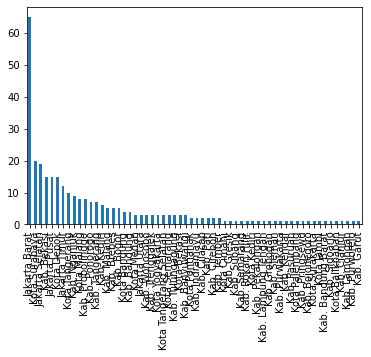

In [ ]:
# kegunaan tempat
df['tempat'].value_counts().plot(x='tempat', y='count', kind='bar')

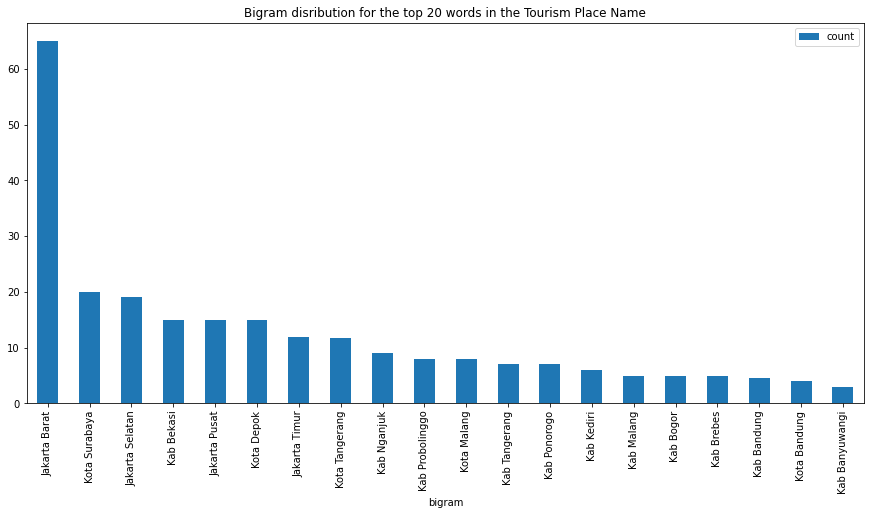

In [ ]:
#Converting text descriptions into vectors using TF-IDF using Bigram
tf = TfidfVectorizer(ngram_range=(2, 2), stop_words='english', lowercase = False)
tfidf_matrix = tf.fit_transform(df['tempat'])
total_words = tfidf_matrix.sum(axis=0) 
#Finding the word frequency
freq = [(word, total_words[0, idx]) for word, idx in tf.vocabulary_.items()]
freq =sorted(freq, key = lambda x: x[1], reverse=True)
#converting into dataframe 
bigram = pd.DataFrame(freq)
bigram.rename(columns = {0:'bigram', 1: 'count'}, inplace = True) 
#Taking first 20 records
bigram = bigram.head(20)

#Plotting the bigram distribution
bigram.plot(x ='bigram', y='count', kind = 'bar', title = "Bigram disribution for the top 20 words in the Pesticide Name", figsize = (15,7), )

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# # Function for removing NonAscii characters
def _removeNonAscii(s):
    return "".join(i for i in s if  ord(i)<128)

# # Function for converting into lower case
# def make_lower_case(text):
#     return text.lower()

# Function for removing stop words
def remove_stop_words(text):
    text = text.split()
    stops = set(stopwords.words("english"))
    text = [w for w in text if not w in stops]
    text = " ".join(text)
    return text

# Function for removing punctuation
def remove_punctuation(text):
    tokenizer = RegexpTokenizer(r'\w+')
    text = tokenizer.tokenize(text)
    text = " ".join(text)
    return text

# Function for removing the html tags
def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)

# Applying all the functions in description and storing as a cleaned_desc
df['cleaned_desc'] = df['nama'].apply(_removeNonAscii)
# df['cleaned_desc'] = df.cleaned_desc.apply(func = make_lower_case)
df['cleaned_desc'] = df.cleaned_desc.apply(func = remove_stop_words)
df['cleaned_desc'] = df.cleaned_desc.apply(func=remove_punctuation)
df['cleaned_desc'] = df.cleaned_desc.apply(func=remove_html)

In [ ]:
def print_description_clean(index):
    example = df[df.index == index][['cleaned_desc', 'nama', 'tempat']].values[0]
    # print(example)
    if len(example) > 0:
        print(example[0])
        print('Nama:', example[1])
        print('Alamat:', example[2])
print_description_clean(111)
print_description_clean(14)

Insektisida sankill 590 EC 400 ml Obat pembasmi walang sangit
Nama: Insektisida sankill 590 EC 400 ml || Obat pembasmi walang sangit
Alamat: Kab. Jember
Filia 525SE 250ml Obat Hawar Daun dan Blast ORI
Nama: Filia 525SE 250ml Obat Hawar Daun dan Blast ORI
Alamat: Jakarta Selatan


In [ ]:
df['cleaned_desc']

0      filia 525se 250ml fungisida obat hawar daun da...
1      DITHANE M 45 80 WP 200 GRAM KEMASAN PABRIK FUN...
2                            Fungisida FILIA 525SE 250ML
3                            fungisida FILIA 525SE 250ML
4      Fungisida sistemik FILIA 525SE penyakit blast ...
                             ...                        
301                 Promo CHLORMITE 400 EC 900 ML Diskon
302    Amarilis 25 EC obat anti rayap pengawet kayu p...
303     STARBAN 585 EC 400 ML INSEKTISIDA ULAT KUTU PADI
304                                     Chlormite 400 EC
305    Insektisida Chlormite 400 EC 100 ml Penggerek ...
Name: cleaned_desc, Length: 306, dtype: object

## reccomendations based on kegunaan and nama

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity  
def recommend(nama, kegunaan):
  data = df.loc[df['kegunaan'] == kegunaan]  
  # return data
  data.reset_index(level = 0, inplace = True) 
  # return data
  # place_name = data['nama']
  # return place_name
    # Convert the index into series
  indices = pd.Series(data.index, index = data['nama'])
  # return indices
    #Converting the place nama into vectors and used bigram
  tf = TfidfVectorizer(analyzer='word', ngram_range=(2, 2), min_df = 1, stop_words='english')
  tfidf_matrix = tf.fit_transform(data['nama'])
  # return tfidf_matrix
  # freq = [word for word, idx in tf.vocabulary_.items()]
  # indices = pd.Series(data.index, index = freq)
  # return freq
    # Calculating the similarity measures based on Cosine Similarity
  sg = cosine_similarity(tfidf_matrix, tfidf_matrix)
  # return sg
    # Get the index corresponding to place name

  idx = indices[nama] # Get the pairwsie similarity scores 
  # return idx
  sig = list(enumerate(sg[idx]))# Sort the names
  # return sig
  sig = sorted(sig, key=lambda x: x[1], reverse=True)# Scores of the 5 most similar books 
  # return sig

  sig = sig[0:10]# Book indicies
  tourist_indices = [i[0] for i in sig]
   
  #   # Top 5 tourist recommendation
  rec = data[['cleaned_desc', 'kegunaan', 'tempat','berat','image-src']].iloc[tourist_indices]
  
  print(rec)     
  # for i in rec['image-src']:
  #   response = requests.get(i)
  #   img = Image.open(BytesIO(response.content))
  #   plt.figure()
  #   print(plt.imshow(img))

In [ ]:
recommend('NEW FUNGISIDA SISTEMIK BENDAS 50 WP - 100 GRAM', 'Brown Spot')


                                          cleaned_desc    kegunaan  \
87        NEW FUNGISIDA SISTEMIK BENDAS 50 WP 100 GRAM  Brown Spot   
86            FUNGISIDA SISTEMIK BENDAS 50 WP 100 GRAM  Brown Spot   
69   FUNGISIDA SISTEMIK BENDAS 50 WP 100 GRAM TERLARIS  Brown Spot   
116                              Bendas 50 wp 100 gram  Brown Spot   
110       NEW FUNGISIDA SISTEMIK BENDAS 50 WP 250 GRAM  Brown Spot   
103                    Fungisida Bendas 50 WP 100 Gram  Brown Spot   
118  Fungisida Sistemik Bendas 50 WP 100 gram Bahan...  Brown Spot   
109              YG732 Fungisida Bendas 50 WP 100 Gram  Brown Spot   
98            FUNGISIDA SISTEMIK BENDAS 50 WP 500 GRAM  Brown Spot   
117           FUNGISIDA SISTEMIK BENDAS 50 WP 250 GRAM  Brown Spot   

               tempat     berat  \
87   Kab. Tulungagung  596 Gram   
86       Kab. Nganjuk  120 Gram   
69      Jakarta Barat  400 Gram   
116       Kab. Sleman  200 Gram   
110  Kab. Tulungagung  665 Gram   
103     Jakarta Bar

In [ ]:

recommend('FUNGISIDA SISTEMIK BENDAS 50 WP - 250 GRAM TERLARIS', 'Brown Spot')


                                          cleaned_desc    kegunaan  \
74   FUNGISIDA SISTEMIK BENDAS 50 WP 250 GRAM TERLARIS  Brown Spot   
117           FUNGISIDA SISTEMIK BENDAS 50 WP 250 GRAM  Brown Spot   
110       NEW FUNGISIDA SISTEMIK BENDAS 50 WP 250 GRAM  Brown Spot   
69   FUNGISIDA SISTEMIK BENDAS 50 WP 100 GRAM TERLARIS  Brown Spot   
128  FUNGISIDA SISTEMIK BENDAS 50 WP 500 GRAM TERLARIS  Brown Spot   
93        Fungisida Sistemik BENDAS 50 WP ISI 250 Gram  Brown Spot   
83            FUNGISIDA SISTEMIK BENLOX 50 WP 250 GRAM  Brown Spot   
76   PERTANIAN Fungisida Bendas 50 WP 250 Gram KOMPLIT  Brown Spot   
125                                Bendas 50 WP 250 gr  Brown Spot   
86            FUNGISIDA SISTEMIK BENDAS 50 WP 100 GRAM  Brown Spot   

                 tempat     berat  \
74          Kab. Bekasi  400 Gram   
117        Kab. Nganjuk  375 Gram   
110    Kab. Tulungagung  665 Gram   
69        Jakarta Barat  400 Gram   
128         Kab. Bekasi  400 Gram   
93     

## convert to pickle


In [ ]:
import pickle

In [ ]:
# data = df.loc[df['kegunaan'] == 'Leaf Blast']  
# data.reset_index(level = 0, inplace = True)

In [ ]:
pickle.dump(df,open("recommend_data.pkl","wb"))


In [ ]:
# np.array(data['nama'])

In [ ]:
tf = TfidfVectorizer(analyzer='word', ngram_range=(2,2), stop_words='english')
tfidf_matrix = tf.fit_transform(df['nama'])
sg = cosine_similarity(tfidf_matrix, tfidf_matrix)

pickle.dump(sg,open("similarity.pkl","wb"))